<a href="https://colab.research.google.com/github/JakaxKato/JakaKelana_1103223048_MidTerm_MLDL/blob/main/JakaKelana_midterm_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install gdown if not already installed
!pip install -U -q gdown

In [2]:
# Replace 'your_folder_id' with the actual folder ID
folder_id = '1FsQtOI_QES15zZLmEw099MGAR5-rnsOP'

# Download all files from the specified Google Drive folder
# The `--folder` flag indicates that the ID belongs to a folder
# The `--id` flag is for the folder ID
# The `--output` flag (optional) can specify a directory to save files,
# but by default, it will download to the current directory.
print(f"Downloading files from folder ID: {folder_id}")
!gdown --folder --id {folder_id}

print("Download complete. You can list the files in the current directory to see the downloaded content.")

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q clusteringmidterm.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q
To: /content/Machine Learning/clusteringmidterm.csv
100% 1.01M/1.01M [00:00<00:00, 17.4MB/s]
Download completed
Download complete. You can list the files in the current directory to see the downloaded content.


In [3]:
import pandas as pd

df = pd.read_csv('/content/Machine Learning/clusteringmidterm.csv')
display(df.head())

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 1. import library dan cek data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


## info dasar dataset

In [5]:
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


## cek missing values

In [6]:
df.isna().sum().sort_values(ascending=False)


,0
MINIMUM_PAYMENTS,313
CREDIT_LIMIT,1
BALANCE,0
CUST_ID,0
BALANCE_FREQUENCY,0
PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0


## Di tahap ini dilakukan eksplorasi awal untuk melihat jumlah fitur, tipe data, distribusi statistik, serta banyaknya missing values per kolom.

## 2. Preprocessing: drop ID, tangani missing value, scaling

## 2.1 Pisahkan fitur dan ID

In [7]:

customer_ids = df['CUST_ID']


X = df.drop(columns=['CUST_ID'])


## 2.2 handle missing values

In [8]:
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

X_imputed = pd.DataFrame(X_imputed, columns=X.columns)


## 2.3 cek distribusi dan outlier

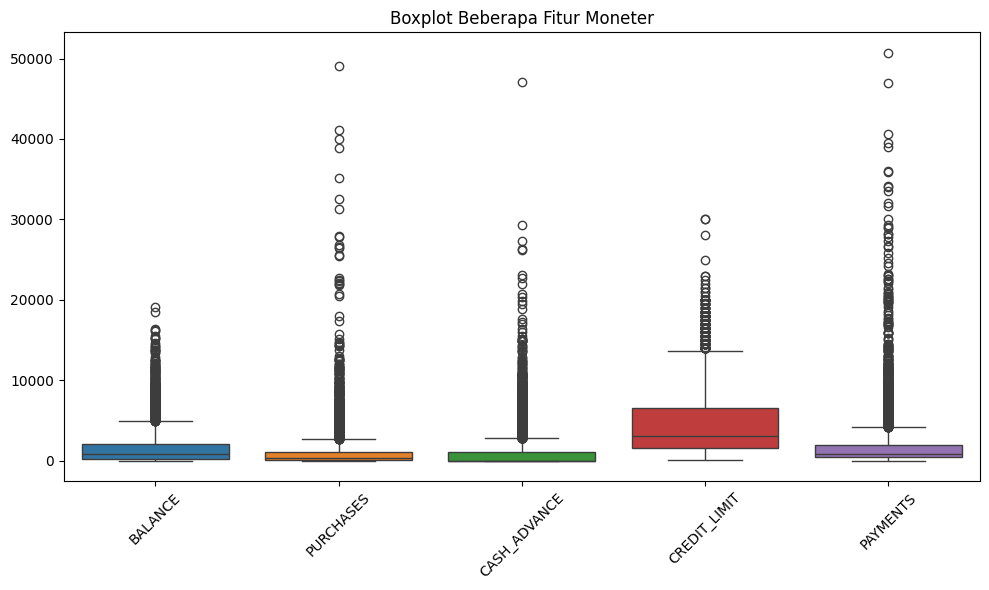

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_imputed[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']])
plt.xticks(rotation=45)
plt.title('Boxplot Beberapa Fitur Moneter')
plt.tight_layout()
plt.show()


## 2.4 scaling fitur

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


## 3. PCA untuk reduksi dimensi & visualisasi

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio (2 komponen):", pca.explained_variance_ratio_.sum())


Explained variance ratio (2 komponen): 0.4761145096128464


## 3.1 plot

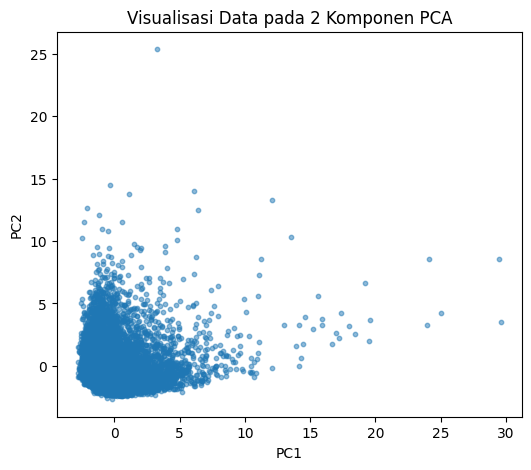

In [12]:
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualisasi Data pada 2 Komponen PCA')
plt.show()


## 4. Menentukan jumlah cluster (K) – Elbow & Silhouette

In [13]:
inertias = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

inertias, sil_scores


([127784.53454477213,
  111975.0435932569,
  99061.93984229007,
  91490.49803950507,
  84826.59203083448,
  79856.15701773313,
  74484.8800618058,
  69828.69926874817,
  66466.41492874314],
 [np.float64(0.210043047433833),
  np.float64(0.25098792290537314),
  np.float64(0.1976791965228765),
  np.float64(0.19311230479899416),
  np.float64(0.20286011584987834),
  np.float64(0.2076861400058817),
  np.float64(0.2216984741387776),
  np.float64(0.22603401853576208),
  np.float64(0.2204379108124534)])

## 4.1 plot kedua metrik

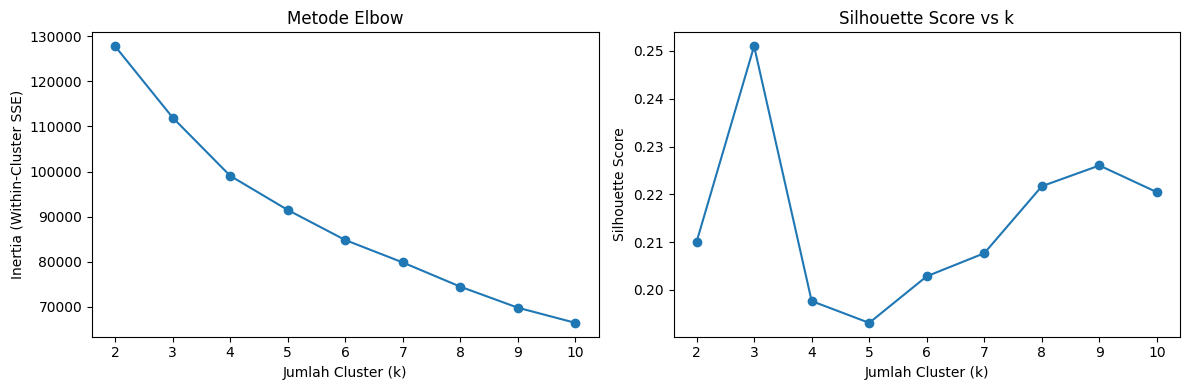

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Elbow (Inertia)
ax[0].plot(K_range, inertias, marker='o')
ax[0].set_xlabel('Jumlah Cluster (k)')
ax[0].set_ylabel('Inertia (Within-Cluster SSE)')
ax[0].set_title('Metode Elbow')

# Silhouette
ax[1].plot(K_range, sil_scores, marker='o')
ax[1].set_xlabel('Jumlah Cluster (k)')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhouette Score vs k')

plt.tight_layout()
plt.show()


## Penentuan jumlah cluster dilakukan menggunakan dua pendekatan, yaitu metode Elbow dan Silhouette Score.

Metode Elbow menunjukkan bahwa penurunan inertia yang paling besar terjadi hingga k = 3–4, dan setelah itu grafik mulai melandai. Hal ini mengindikasikan bahwa k = 3 atau 4 merupakan kandidat jumlah cluster yang baik.

Silhouette Score mencapai nilai tertinggi pada k = 3 (sekitar 0.25), yang menunjukkan bahwa pemisahan antar-cluster paling optimal terjadi ketika data dibagi menjadi tiga kelompok.

Berdasarkan kedua metode tersebut, jumlah cluster yang dipilih untuk model akhir adalah k = 3, karena memberikan keseimbangan terbaik antara kompaktitas cluster dan separasi antar cluster.

## 5. Training model clustering utama

In [15]:
k_optimal = 3  # GANTI sesuai hasil analisis kamu

kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Tambahkan cluster ke dataframe asli
df['cluster_kmeans'] = cluster_labels


## 5.1 silhoutte untuk model final

In [16]:
sil_final = silhouette_score(X_scaled, cluster_labels)
print("Silhouette score model K-Means final:", sil_final)


Silhouette score model K-Means final: 0.25098792290537314


## 5.2 visualisasi di ruang PCA

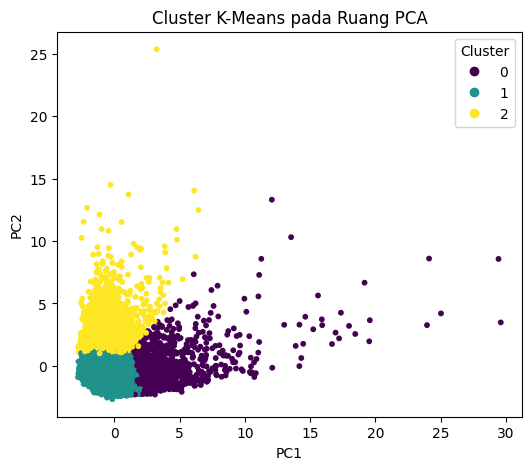

In [17]:
plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster K-Means pada Ruang PCA')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


## Penambahan model deep learning

In [18]:
# --- DEEP LEARNING CLUSTERING: AUTOENCODER + K-MEANS ---

import tensorflow as tf
from tensorflow.keras import layers, models

input_dim = X_scaled.shape[1]

# Arsitektur Autoencoder sederhana (bottleneck 2 dimensi)
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(16, activation='relu')(input_layer)
encoded = layers.Dense(8, activation='relu')(encoded)
latent = layers.Dense(2, activation='relu', name='latent_layer')(encoded)  # 2D latent space

decoded = layers.Dense(8, activation='relu')(latent)
decoded = layers.Dense(16, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='linear')(decoded)

autoencoder = models.Model(inputs=input_layer, outputs=decoded)
encoder = models.Model(inputs=input_layer, outputs=latent)

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_layer (Dense)            │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 17)             │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 899 (3.51 KB)

 Trainable params: 899 (3.51 KB)

 Non-trainable params: 0 (0.00 B)

## Training autoencoder

In [19]:
autoencoder.compile(optimizer='adam', loss='mse')

history = autoencoder.fit(
    X_scaled, X_scaled,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.9617 - val_loss: 0.6419
Epoch 2/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5831 - val_loss: 0.5495
Epoch 3/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5151 - val_loss: 0.5003
Epoch 4/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4812 - val_loss: 0.4637
Epoch 5/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4631 - val_loss: 0.4385
Epoch 6/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4374 - val_loss: 0.4261
Epoch 7/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4154 - val_loss: 0.4145
Epoch 8/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4218 - val_loss: 0.4094
Epoch 9/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3975 - val_loss: 0.4074
Epoch 10/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4075 - val_loss: 0.4038
Epoch 11/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3831 - val_loss: 0.4038
Epoch 12/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

## Fitur laten dan clustering

In [20]:
# Ekstrak representasi laten (2 dimensi)
latent_features = encoder.predict(X_scaled)

# K-Means di ruang laten
kmeans_ae = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
labels_ae = kmeans_ae.fit_predict(latent_features)

sil_ae = silhouette_score(latent_features, labels_ae)

print("Silhouette K-Means (fit di fitur asli):", sil_final)
print("Silhouette Autoencoder + K-Means    :", sil_ae)


280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Silhouette K-Means (fit di fitur asli): 0.25098792290537314
Silhouette Autoencoder + K-Means    : 0.49826515


In [21]:
kmeans_base = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
labels_base = kmeans_base.fit_predict(X_scaled)
sil_final = silhouette_score(X_scaled, labels_base)


## visualisasi cluster di latent space

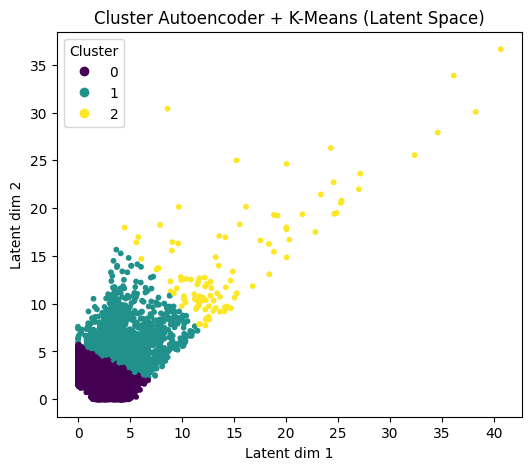

In [22]:
plt.figure(figsize=(6, 5))
scatter = plt.scatter(latent_features[:, 0], latent_features[:, 1],
                      c=labels_ae, s=10)
plt.xlabel('Latent dim 1')
plt.ylabel('Latent dim 2')
plt.title('Cluster Autoencoder + K-Means (Latent Space)')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


## 6. Interpretasi cluster

## 6.1 rata-rata tiap fitur per cluster

In [23]:
cluster_profile = df.groupby('cluster_kmeans').mean(numeric_only=True)
cluster_profile


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster_kmeans,,,,,,,,,,,,,,,,,
0,2182.352833,0.981702,4187.017796,2663.995153,1523.493231,449.753140,0.948175,0.664780,0.739630,0.062415,1.507451,55.692549,7642.784314,4075.533648,1234.424684,0.298766,11.916863
1,807.722510,0.834577,496.062522,247.273214,249.110368,338.996760,0.460353,0.129191,0.342052,0.069563,1.236833,8.480046,3267.065857,907.446164,540.635526,0.154115,11.475793
2,4023.788865,0.959193,389.051448,252.333261,136.797412,3917.254973,0.233899,0.111806,0.145661,0.451410,12.551570,5.636131,6729.471201,3053.943771,1785.015912,0.033673,11.353619


## 6.2 fitur penting

In [24]:
cols_utama = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
]

cluster_profile[cols_utama]


,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster_kmeans,,,,,,,,,,,,
0,2182.352833,4187.017796,2663.995153,1523.493231,449.753140,0.948175,0.062415,7642.784314,4075.533648,1234.424684,0.298766,11.916863
1,807.722510,496.062522,247.273214,249.110368,338.996760,0.460353,0.069563,3267.065857,907.446164,540.635526,0.154115,11.475793
2,4023.788865,389.051448,252.333261,136.797412,3917.254973,0.233899,0.451410,6729.471201,3053.943771,1785.015912,0.033673,11.353619


## 6.3 normalisasi kolom

In [25]:
cluster_profile_norm = cluster_profile[cols_utama].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)
cluster_profile_norm


,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster_kmeans,,,,,,,,,,,,
0,0.427426,1.000000,1.000000,1.000000,0.030953,1.00000,0.000000,1.000000,1.000000,0.557538,1.000000,1.000000
1,0.000000,0.028176,0.000000,0.080993,0.000000,0.31704,0.018376,0.000000,0.000000,0.000000,0.454338,0.216911
2,1.000000,0.000000,0.002094,0.000000,1.000000,0.00000,1.000000,0.791277,0.677537,1.000000,0.000000,0.000000


## 6.4 plot heatmap

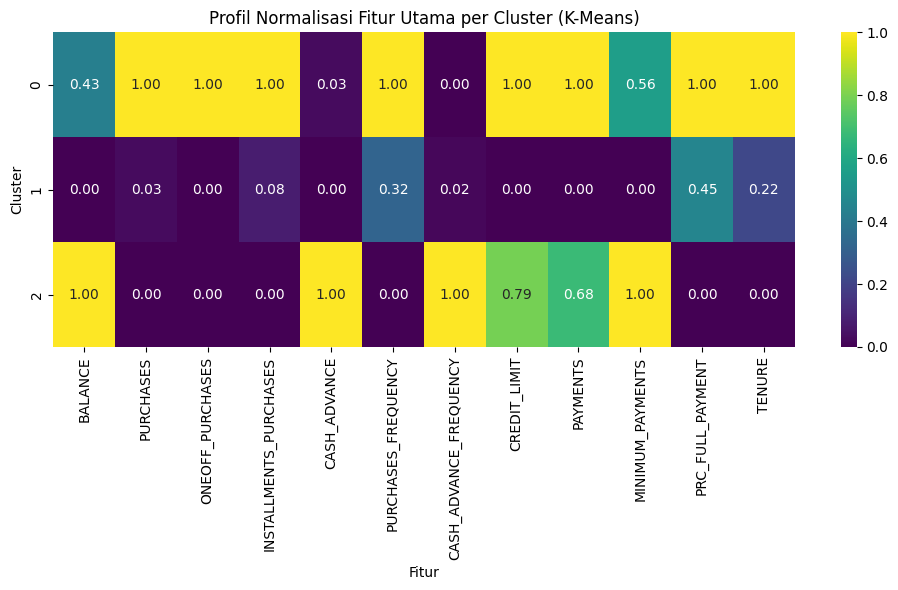

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profile_norm, annot=True, fmt=".2f", cmap='viridis')
plt.title('Profil Normalisasi Fitur Utama per Cluster (K-Means)')
plt.ylabel('Cluster')
plt.xlabel('Fitur')
plt.tight_layout()
plt.show()


## 6.5 Kesimpulan

Cluster 1 – “Low Usage & Low Risk Customers”

(Penggunaan kartu rendah, pembayaran lancar, sangat sedikit aktivitas finansial besar)

Ciri-ciri:

BALANCE = 0.00 → sangat rendah
Tidak punya tagihan besar.

PURCHASES / ONEOFF / INSTALLMENTS → sangat rendah
Hampir tidak pernah belanja memakai kartu kredit.

CASH_ADVANCE, CASH_ADVANCE_FREQUENCY → 0
Tidak pernah tarik tunai sama sekali.

PURCHASES_FREQUENCY → sedang (0.32)
Kadang belanja kecil-kecilan.

MINIMUM_PAYMENTS → sangat rendah
Karena memang tidak ada tagihan besar.

PRC_FULL_PAYMENT → 0.45
Hampir selalu membayar penuh (sesuai penggunaan yang kecil).

TENURE → 0.22
Pelanggan baru atau belum memakai kartu untuk waktu yang lama.

Kesimpulan Cluster 1:

Pelanggan dengan penggunaan kartu yang rendah, transaksi kecil, jarang atau tidak pernah melakukan cash advance, dan cenderung low risk.
Mereka bukan penyumbang pendapatan besar, tetapi stabil dan aman untuk dipertahankan.

Cluster 2 – “High Balance + High Cash Advance Users” (Risky Users)

(Penggunaan tinggi, banyak cash advance, pembayaran tidak optimal)

Ciri utama:

BALANCE → 1.00 (paling tinggi)
Tagihan kartu kredit mereka besar → tanda potensi risiko.

CASH_ADVANCE → 1.00
Sangat sering menarik uang tunai lewat kartu → indikator finansial yang lebih berisiko.

CASH_ADVANCE_FREQUENCY → 1.00
Perilaku tarik tunai berulang-ulang.

PURCHASES_FREQUENCY → 0
Jarang belanja menggunakan kartu → mereka lebih memanfaatkan kartu sebagai “sumber pinjaman”.

CREDIT_LIMIT → cukup tinggi (0.79)
Bank memberi limit besar, dan mereka memanfaatkannya.

PAYMENTS → tinggi (0.68)
Mereka membayar, tetapi tidak cukup untuk menurunkan balance secara signifikan.

PRC_FULL_PAYMENT → 0
Tidak pernah bayar tagihan penuh.

TENURE → 0
Sepertinya pelanggan baru tetapi langsung menunjukkan pola penggunaan agresif.

Kesimpulan Cluster 2:

Pelanggan dengan tagihan besar, sangat aktif menggunakan cash advance, jarang melakukan pembayaran penuh, dan cenderung berpotensi risiko tinggi bagi bank.
Perlu dipantau untuk manajemen risiko kredit.

## 7. Agglomerative

In [27]:
agg = AgglomerativeClustering(n_clusters=k_optimal)
labels_agg = agg.fit_predict(X_scaled)

sil_agg = silhouette_score(X_scaled, labels_agg)
print("Silhouette score Agglomerative:", sil_agg)


Silhouette score Agglomerative: 0.1674469835551831


## 7.1 plot di PCA

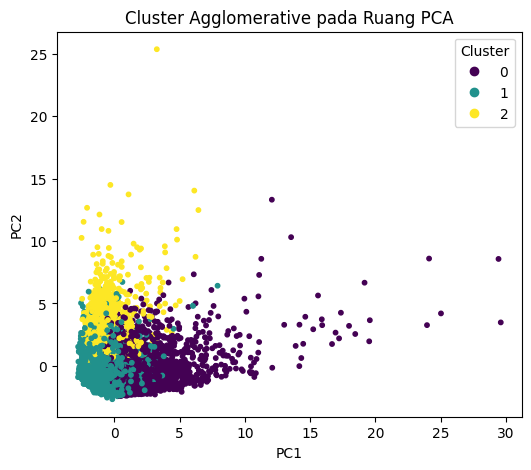

In [28]:
plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_agg, s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Agglomerative pada Ruang PCA')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()
